<a href="https://colab.research.google.com/github/FlamingoLindo/UMC-Age-of-Empires-2/blob/main/teste_age_of_empires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports das bibliotecas necessárias para o projeto

In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

# Importação do dataset diretamente do repositório do projeto

O dataset utilizado nesse projeto foi obtido no site Kaggle, criado pelo usuário Nico Elbert:
https://www.kaggle.com/datasets/nicoelbert/aoe-matchups?resource=download

In [329]:
file_path = 'https://raw.githubusercontent.com/FlamingoLindo/UMC-Age-of-Empires-2/main/aoe_data.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,match_id,map,map_size,duration,dataset,difficulty,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,50453403,50453403,Arabia,Tiny,3445,Definitive Edition,Hardest,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,118982970,118982970,Arena,Tiny,2932,Definitive Edition,Hardest,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,57185801,57185801,Arena,Tiny,2573,Definitive Edition,Hardest,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,64335748,64335748,Arabia,Tiny,851,Definitive Edition,Hardest,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,116883036,116883036,Arabia,Tiny,4737,Definitive Edition,Hardest,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


# Análise de valores unícos do dataset

In [330]:
colunas = df.columns

for nome_coluna in colunas:
    unique_values = df[nome_coluna].unique()
    unique_qnt = df[nome_coluna].nunique()
    print(f'Valores unícos em {nome_coluna}: {unique_values}')
    print(f'Quantidade de valores unicos {unique_qnt} \n')

Valores unícos em Unnamed: 0: [ 50453403 118982970  57185801 ... 124942713 141486159 139998132]
Quantidade de valores unicos 224599 

Valores unícos em match_id: [ 50453403 118982970  57185801 ... 124942713 141486159 139998132]
Quantidade de valores unicos 224599 

Valores unícos em map: ['Arabia' 'Arena' 'Four Lakes' 'Steppe' 'Golden Pit' 'African Clearing'
 'Serengeti' 'Nomad' 'MegaRandom' 'Coastal Forest' 'Atacama' 'Acropolis'
 'Golden Swamp' 'Gold Rush' 'Aftermath' 'Socotra' 'Hideout' 'Valley'
 'Water Nomad' 'Mongolia' 'Ghost Lake' 'Baltic' 'Marketplace'
 'Archipelago' 'Runestones' 'Islands' 'Crater' 'Mediterranean'
 'Land Nomad' 'Migration' 'Team Islands' 'Wade' 'Land Madness' 'Lowland'
 'Fortress' 'Seize the Mountain' 'Greenland' 'Lombardia' 'Hill Fort'
 'Haboob' 'Volcanic Island' 'Yucatan' 'Cenotes' 'Coastal' 'Northern Isles']
Quantidade de valores unicos 45 

Valores unícos em map_size: ['Tiny']
Quantidade de valores unicos 1 

Valores unícos em duration: [3445 2932 2573 ... 59

# Criar um dataframe apenas para testes e treinamento

In [331]:
train_df = df.copy()

# Remoção de colunas não necessárias

In [332]:
#
train_df.drop([ 'map_size', 'dataset', 'difficulty'], axis=1, inplace=True)
train_df.head()

,Unnamed: 0,match_id,map,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,50453403,50453403,Arabia,3445,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,118982970,118982970,Arena,2932,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,57185801,57185801,Arena,2573,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,64335748,64335748,Arabia,851,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,116883036,116883036,Arabia,4737,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


# Valores nulos no dataset

In [333]:
train_df.isna().sum()

Unnamed: 0        0
match_id          0
map               0
duration          0
elo               0
p1_civ            0
p2_civ            0
p1_xpos       10596
p2_xpos       10596
p1_ypos       10596
p2_ypos       10596
winner            0
dtype: int64

Aqui é possivel ver que existem "10596" valores como "NaN" nas colunas de coordenadas iniciais dos jogadores.

## Pode-se optar por remover todas as linhas que contem valores com "NaN" ou fazer a média dos valores existentes e então substiruir os não existentes pela média:

In [334]:

#Caso queira utilizar a média das cooredenas ao invés de apenas remover as linhas
#com NaN

# Média p1_xpos
# med_p1x = train_df['p1_xpos'].mean()
# train_df['p1_xpos'] = train_df['p1_xpos'].fillna(med_p1x)

# # Média p2_xpos
# med_p2x = train_df['p2_xpos'].mean()
# train_df['p2_xpos'] = train_df['p2_xpos'].fillna(med_p2x)
# # Média p1_ypos
# med_p1y = train_df['p1_ypos'].mean()
# train_df['p1_ypos'] = train_df['p1_ypos'].fillna(med_p1y)

# # Média p2_ypos
# med_p2y = train_df['p2_ypos'].mean()
# train_df['p2_ypos'] = train_df['p2_ypos'].fillna(med_p2y)

train_df.dropna(inplace=True)
train_df.isna().sum()
print(train_df)

        Unnamed: 0   match_id     map  duration     elo      p1_civ  \
0         50453403   50453403  Arabia      3445  1104.0     Vikings   
1        118982970  118982970   Arena      2932   884.5     Britons   
2         57185801   57185801   Arena      2573   905.5     Chinese   
3         64335748   64335748  Arabia       851  1080.0      Mayans   
4        116883036  116883036  Arabia      4737  1050.0     Berbers   
...            ...        ...     ...       ...     ...         ...   
224593   140366448  140366448   Arena      2917   992.0       Goths   
224594   137272191  137272191  Arabia      2525  1540.0     Mongols   
224596   124942713  124942713  Arabia      4243   870.5  Bulgarians   
224597   141486159  141486159  Arabia      3280  1234.5       Turks   
224598   139998132  139998132  Arabia      2506  1432.0     Vikings   

            p2_civ  p1_xpos  p2_xpos  p1_ypos  p2_ypos  winner  
0           Mayans     92.0     24.0     37.0     78.0       0  
1            Goth

# Criar distância entre pontos

In [335]:
for cordenadas in train_df:
    distancia = np.sqrt((train_df['p2_xpos']-train_df['p2_xpos'])**2 + (train_df['p2_ypos']-train_df['p1_ypos'])**2)

train_df['distance'] = distancia
print(distancia)    

0         41.0
1         82.0
2         88.0
3         12.0
4         57.0
          ... 
224593    89.0
224594     1.0
224596    36.0
224597    23.0
224598    70.0
Length: 214003, dtype: float64


# Remoção de linhas para que o treinamento ocorra mas rápido

In [336]:
train_df = train_df.sample(900)
print(train_df)

        Unnamed: 0   match_id         map  duration     elo       p1_civ  \
83790     90844108   90844108       Arena      2393  1091.0   Ethiopians   
172263   132261988  132261988  Runestones      1547  1299.5      Berbers   
185771   137242576  137242576      Arabia      2215   914.0  Lithuanians   
169531   101626918  101626918  MegaRandom      2839   950.5      Vikings   
222504   123019159  123019159      Arabia      2573  1379.0   Ethiopians   
...            ...        ...         ...       ...     ...          ...   
111812    75319531   75319531    Fortress      2180  1087.5      Chinese   
33583    127127051  127127051  Golden Pit      2123  1092.5   Bulgarians   
113768   134527160  134527160  Golden Pit      1774   881.0      Vikings   
98526    126951598  126951598      Arabia      4392  1068.5       Mayans   
65394     76380153   76380153      Arabia      2022  1169.0      Chinese   

            p2_civ  p1_xpos  p2_xpos  p1_ypos  p2_ypos  winner  distance  
83790       

# Tipos de encoding para colunas categóricas

## Label encoding

In [337]:
le_map = LabelEncoder()
train_df['map_encoded'] = le_map.fit_transform(train_df['map'])

# le_civ = LabelEncoder()

# train_df['p1_civ_encoded'] = le_civ.fit_transform(train_df['p1_civ'])
# le_civ2 = LabelEncoder()

# train_df['p2_civ_encoded'] = le_civ2.fit_transform(train_df['p2_civ'])
# train_df.head()

## One hot

In [338]:
# one_map = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# map_transformed = one_map.fit_transform(train_df[['map']])


one_civ1 = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
civ1_transformed = one_civ1.fit_transform(train_df[['p1_civ']])


one_civ2 = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
civ2_transformed = one_civ2.fit_transform(train_df[['p2_civ']])

# Adicionar map_transformed se usar ele com onehot
train_df = pd.concat([train_df, civ1_transformed, civ2_transformed], axis=1)
train_df.head()

,Unnamed: 0,match_id,map,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,...,p2_civ_Portuguese,p2_civ_Saracens,p2_civ_Sicilians,p2_civ_Slavs,p2_civ_Spanish,p2_civ_Tatars,p2_civ_Teutons,p2_civ_Turks,p2_civ_Vietnamese,p2_civ_Vikings
83790,90844108,90844108,Arena,2393,1091.0,Ethiopians,Goths,104.0,24.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172263,132261988,132261988,Runestones,1547,1299.5,Berbers,Sicilians,47.0,99.0,98.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185771,137242576,137242576,Arabia,2215,914.0,Lithuanians,Vietnamese,66.0,50.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
169531,101626918,101626918,MegaRandom,2839,950.5,Vikings,Magyars,60.0,64.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222504,123019159,123019159,Arabia,2573,1379.0,Ethiopians,Magyars,65.0,46.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Remoção de colunas categoricas

In [339]:
train_df.drop(['map', 'p1_civ', 'p2_civ','match_id','Unnamed: 0','p1_xpos','p2_xpos','p1_ypos','p2_ypos'], axis=1, inplace=True)
train_df.head()

# IF YOU REMOVE THE ELO OR THE DURATION COLUMN IT IT WILL MAKE THE ALGO GUESS IT WRONG???

,duration,elo,winner,distance,map_encoded,p1_civ_Aztecs,p1_civ_Berbers,p1_civ_Bohemians,p1_civ_Britons,p1_civ_Bulgarians,...,p2_civ_Portuguese,p2_civ_Saracens,p2_civ_Sicilians,p2_civ_Slavs,p2_civ_Spanish,p2_civ_Tatars,p2_civ_Teutons,p2_civ_Turks,p2_civ_Vietnamese,p2_civ_Vikings
83790,2393,1091.0,1,32.0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172263,1547,1299.5,0,46.0,26,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185771,2215,914.0,0,77.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
169531,2839,950.5,1,47.0,23,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222504,2573,1379.0,1,84.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Separação de dados de teste e treino (80/20)

In [340]:
X = train_df.drop('winner', axis=1)
y = train_df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=train_df['winner'])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treino do modelo SVC e matriz de confusão

In [341]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

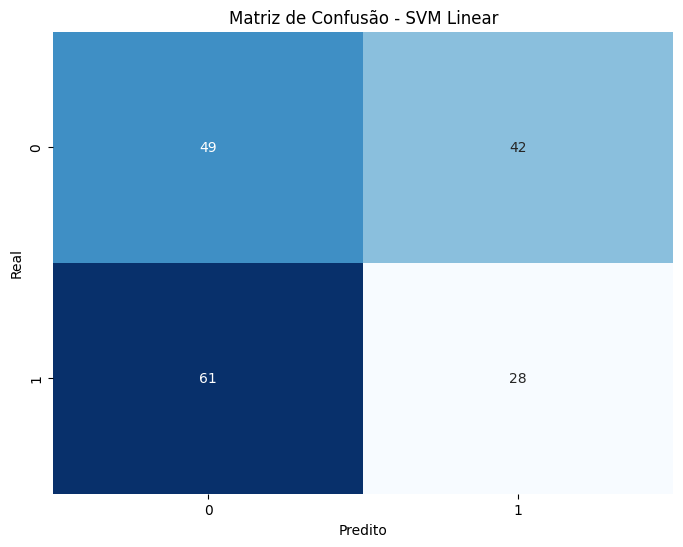

              precision    recall  f1-score   support

           0       0.45      0.54      0.49        91
           1       0.40      0.31      0.35        89

    accuracy                           0.43       180
   macro avg       0.42      0.43      0.42       180
weighted avg       0.42      0.43      0.42       180



In [342]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

# Treino do modelo com diferentes valores para C, Gamma e Kernels e os melhores parâmetros

In [343]:
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly'],
}

#https://scikit-learn.org/dev/modules/model_evaluation.html#matthews-correlation-coefficient
grid_search = GridSearchCV(svm, param_grid, cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [344]:
print('Melhores parâmetros: ', grid_search.best_params_)
print('Melhor estimador: ', grid_search.best_estimator_)

Melhores parâmetros:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Melhor estimador:  SVC(C=10, gamma=0.1, probability=True)


In [345]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


## Matriz do treino com os melhores parâmetros

<Figure size 640x480 with 0 Axes>

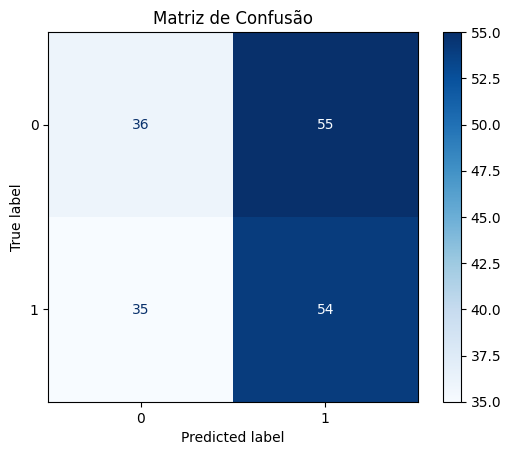

              precision    recall  f1-score   support

           0       0.51      0.40      0.44        91
           1       0.50      0.61      0.55        89

    accuracy                           0.50       180
   macro avg       0.50      0.50      0.49       180
weighted avg       0.50      0.50      0.49       180



In [346]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()
print(classification_report(y_test, y_pred))

# Permutação

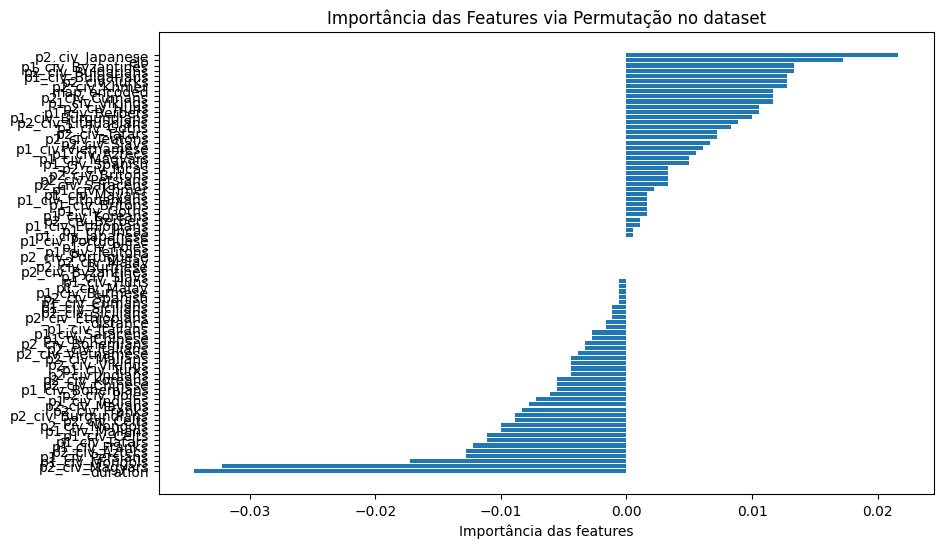

In [347]:
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Importância das features')
plt.title('Importância das Features via Permutação no dataset')
plt.show()

## Análise das features

In [348]:
fp_indices = np.where((y_pred == 1) & (y_test != 1))[0]
fn_indices = np.where((y_pred != 1) & (y_test == 1))[0]
fp_samples = X_test.iloc[fp_indices]
fn_samples = X_test.iloc[fn_indices]
correctly_classified_samples = X_test[(y_pred == y_test)]
fp_mean = fp_samples.mean()
fn_mean = fn_samples.mean()
correctly_classified_mean = correctly_classified_samples.mean()
comparison_df = pd.DataFrame({
    'Falsos positivos': fp_mean,
    'Falsos Negativos': fn_mean,
    'Classificados corretamente': correctly_classified_mean
})
print('Comparação das Features (Médias):')
print(comparison_df)

Comparação das Features (Médias):
                   Falsos positivos  Falsos Negativos  \
duration                2405.818182       2304.828571   
elo                     1095.309091       1093.942857   
distance                  45.072727         46.600000   
map_encoded                6.127273          2.600000   
p1_civ_Aztecs              0.018182          0.000000   
...                             ...               ...   
p2_civ_Tatars              0.018182          0.028571   
p2_civ_Teutons             0.000000          0.057143   
p2_civ_Turks               0.018182          0.028571   
p2_civ_Vietnamese          0.036364          0.000000   
p2_civ_Vikings             0.000000          0.028571   

                   Classificados corretamente  
duration                          2226.077778  
elo                               1107.727778  
distance                            45.588889  
map_encoded                          6.277778  
p1_civ_Aztecs                        0.02